
... ***CURRENTLY UNDER DEVELOPMENT*** ...


## RBFs validation of historical and synthetic data

inputs required: 
  * Historical nearshore hourly waves
  * Synthetic nearshore hourly waves

in this notebook:
  * Validation: AWAC measurement 
  * Synthetic and historical waves Extremes
  

### TODO
- FALLO EN LA COMPARATIVA DE EXTREMOS
- VALIDACION VS BOYA AWAC + PLOTEO


In [1]:
#!/usr/bin/env python
# -*- coding: utf-8 -*-

# common
import os
import os.path as op

# pip
import numpy as np
import pandas as pd
import xarray as xr

# DEV: override installed teslakit
import sys
sys.path.insert(0, op.join(os.path.abspath(''), '..', '..', '..'))

# teslakit
from teslakit.database import Database
from teslakit.rbf import RBF_Reconstruction, RBF_Validation
from teslakit.waves import Aggregate_WavesFamilies, AWL
from teslakit.climate_emulator import Climate_Emulator

from teslakit.plotting.extremes import Plot_ReturnPeriodValidation



## Database and Site parameters

In [2]:
# --------------------------------------
# Teslakit database

p_data = r'/Users/nico/Projects/TESLA-kit/TeslaKit/data'
db = Database(p_data)

# set site
db.SetSite('ROI')


In [3]:
# --------------------------------------
# Load nearshore hourly waves for extremes analysis

# Historical
HIST_N_h = db.Load_NEARSHORE_RECONSTRUCTION_HIST_hourly()

# Simulation
SIM_N_h = db.Load_NEARSHORE_RECONSTRUCTION_SIM_hourly()



## Methodology Validation: AWL Nearshore - Annual Maxima Return Period

In [4]:
# def. some auxiliar function to select all dataset variables at vn max by groups

def grouped_max(ds, vn=None, dim=None):
    return ds.isel(**{dim: ds[vn].argmax(dim)})


In [5]:
# Historical AWL Annual Maxima

# calculate AWL annual maxima dataset
hist_AMax = HIST_N_h.groupby('time.year').apply(grouped_max, vn='AWL', dim='time')


In [6]:
# Simulation AWL Annual Maxima

# replace nans by 0
SIM_N_nonan = SIM_N_h.fillna(0)

# calculate AWL annual maxima dataset
sim_AMax = SIM_N_nonan.groupby('time.year').apply(grouped_max, vn='AWL', dim='time')


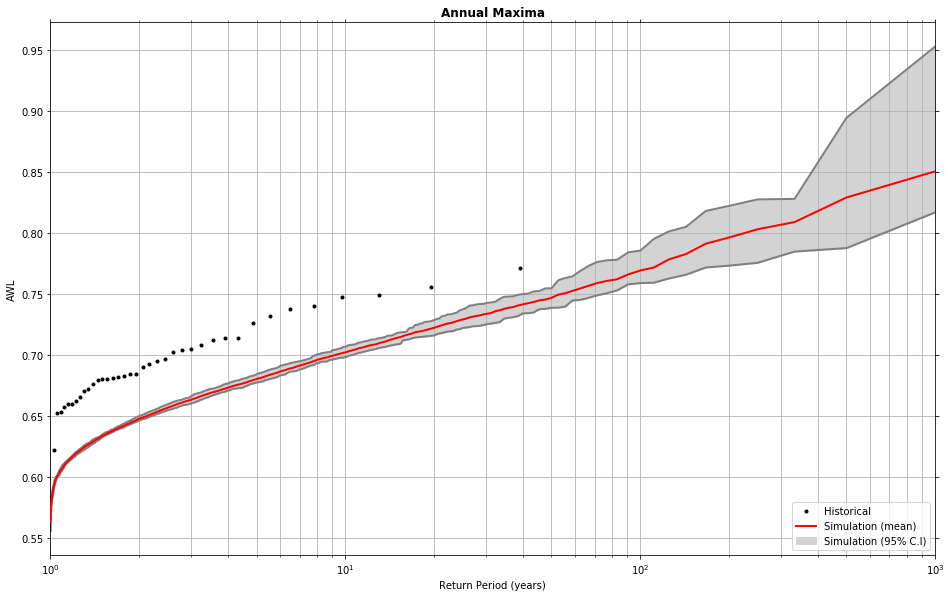

In [7]:
# AWL Annual Maxima Return Period (historical vs. simulations)

Plot_ReturnPeriodValidation(hist_AMax['AWL'], sim_AMax['AWL'].transpose());


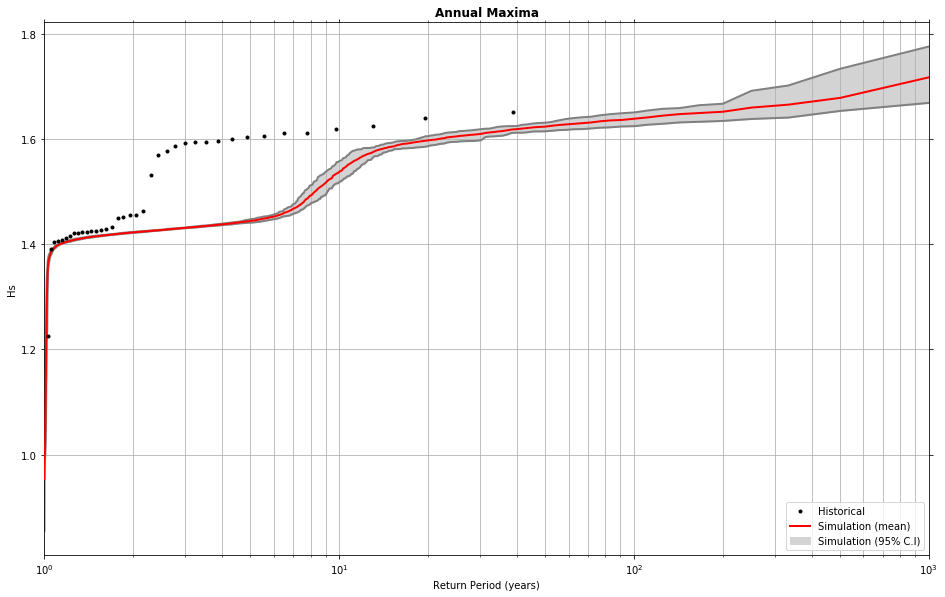

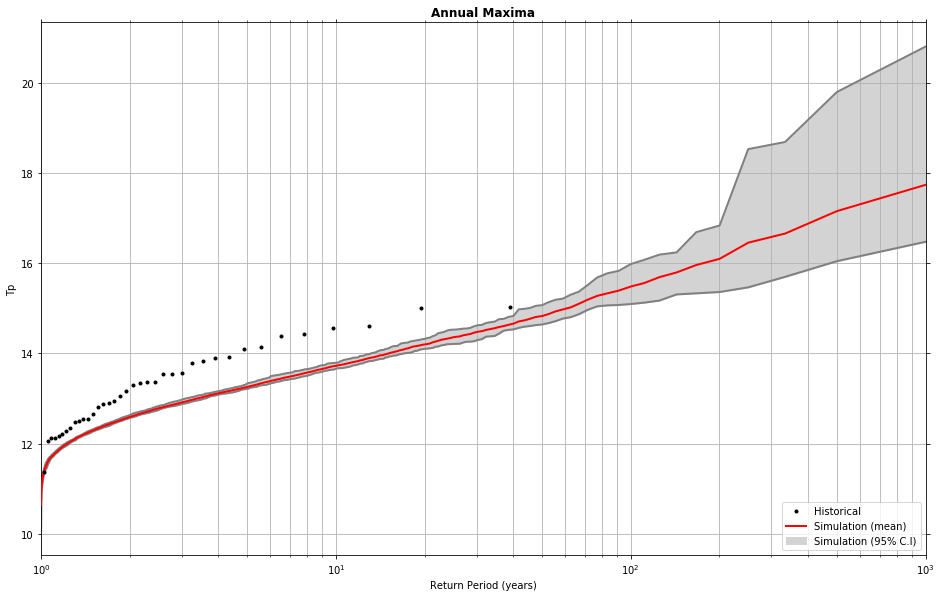

In [8]:
# Hs and Tp Return Period (historical vs. simulations) at AWL Annual Maxima

# Hs at AWL Annual Maxima
Plot_ReturnPeriodValidation(hist_AMax['Hs'], sim_AMax['Hs'].transpose());

# Tp at AWL Annual Maxima
Plot_ReturnPeriodValidation(hist_AMax['Tp'], sim_AMax['Tp'].transpose());



## Comentarios sobre el fallo


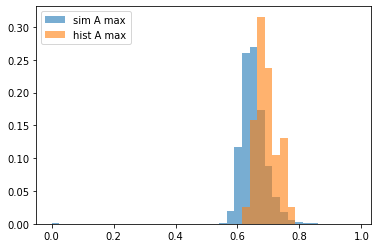

In [9]:
# TODO: ALGO ESTA MAL CON LOS EXTREMOS

# el oleaje NEARSHORE por familias sale bien (igual que la version anterior del notebook)

# hemos cambiado la forma de agregar el oleaje en Tp, antes de ejecutar AWL.

# comparando con el notebook de gitlab (version anterior del codigo): Es el historico el que sale más grande que antes...




# comparar histograma extremos AWL
x = hist_AMax.AWL.values[:]
#y = sim_AMax.AWL.sel(n_sim=1).values[:]  # one sim
y = sim_AMax.AWL.values[:].flatten()  # all sims


from matplotlib import pyplot
(_, bins, _) = pyplot.hist(y, 40, weights=np.ones(len(y))/len(y), alpha=0.6, label='sim A max')
pyplot.hist(x, bins=bins, weights=np.ones(len(x))/len(x), alpha=0.6, label='hist A max')
pyplot.legend(loc='upper left')
pyplot.show()



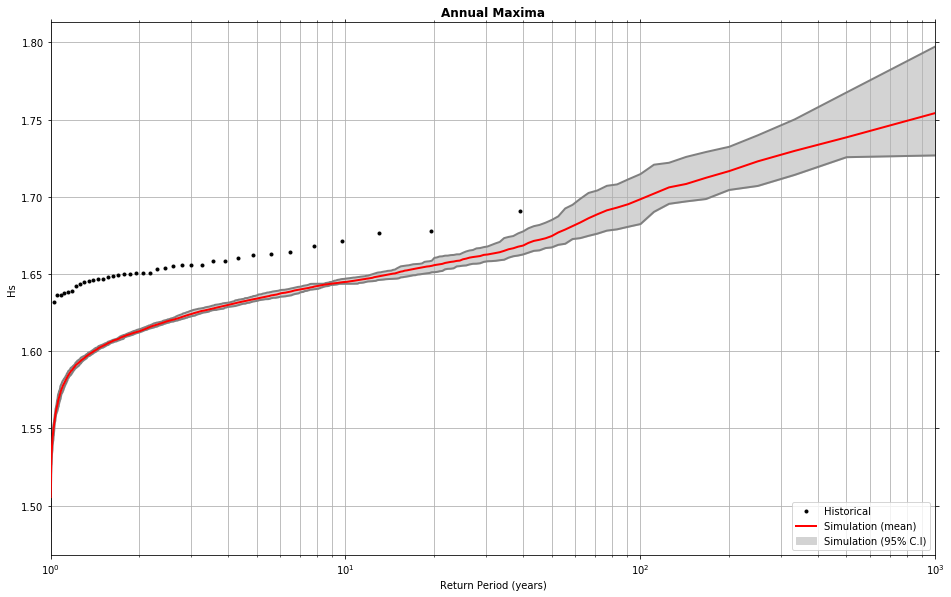

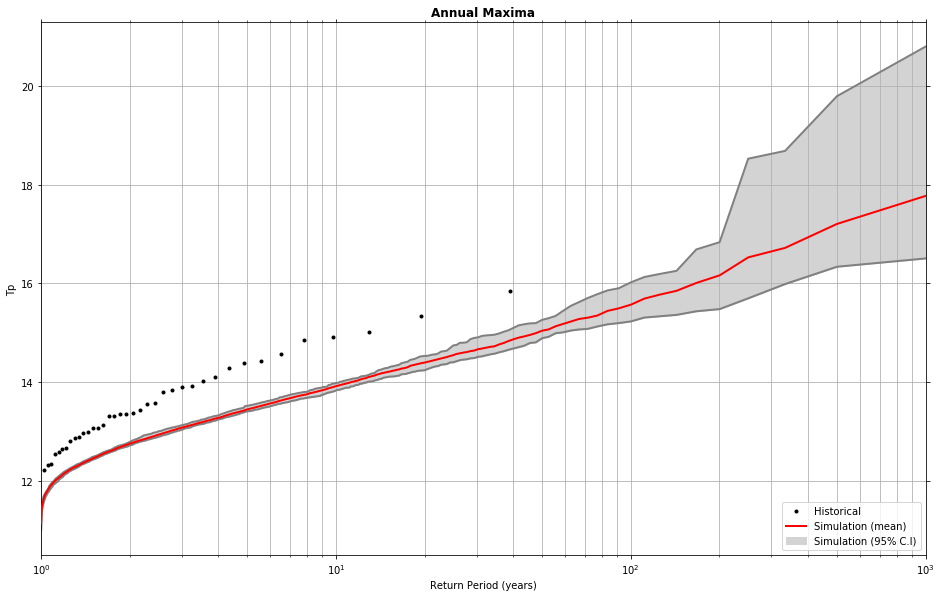

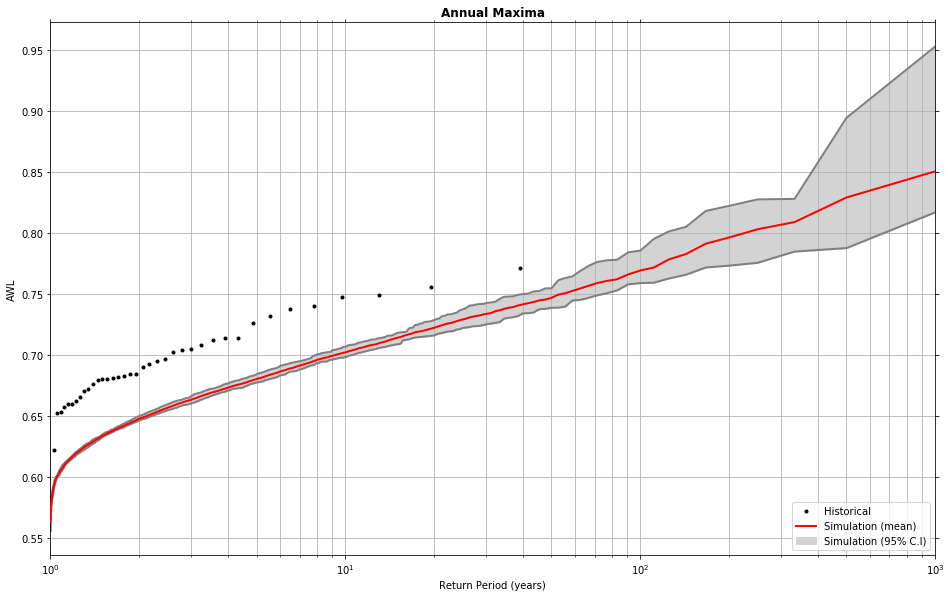

In [10]:
# TODO: estos ploteos estaban correctos en la version anterior

vns = ['Hs', 'Tp', 'AWL']
for vn in vns:

    # calculate Annual Maxima values for historical and simulated data
    hist_A = HIST_N_h[vn].groupby('time.year').max(dim='time')
    sim_A = SIM_N_h[vn].groupby('time.year').max(dim='time')
    #sim_A = xr.concat([x[vn].groupby('time.year').max(dim='time') for x in l_sims_rec], 'n_sim')

    # Return Period historical vs. simulations
    Plot_ReturnPeriodValidation(hist_A, sim_A);


## Methodology Validation: AWAC Buoy comparison

In [11]:
# TODO
